In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

  Using cached tensorflow-2.12.0-cp38-cp38-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp38-cp38-win_amd64.whl (272.8 MB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
     ---------------------------------------- 1.3/1.3 MB 3.2 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
     -------------------------------------- 422.4/422.4 kB 2.0 MB/s eta 0:00:00
  Using cached wrapt-1.14.1-cp38-cp38-win_amd64.whl (35 kB)
  Using cached numpy-1.23.5-cp38-cp38-win_amd64.whl (14.7 MB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
     ------------------------------------- 938.6/938.6 kB 1

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.10.0 requires keras<2.11,>=2.10.0, but you have keras 2.12.0 which is incompatible.
tensorflow-gpu 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.23.3 which is incompatible.
tensorflow-gpu 2.10.0 requires tensorboard<2.11,>=2.10, but you have tensorboard 2.12.3 which is incompatible.
tensorflow-gpu 2.10.0 requires tensorflow-estimator<2.11,>=2.10.0, but you have tensorflow-estimator 2.12.0 which is incompatible.


In [3]:
pip install -U tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip show tensorflow

Name: tensorflow
Version: 2.12.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\user\anaconda3\envs\ashin_mei\lib\site-packages
Requires: tensorflow-intel
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install geopy scikit-learn folium

     -------------------------------------- 119.8/119.8 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 8.3/8.3 MB 6.5 MB/s eta 0:00:00
     -------------------------------------- 102.3/102.3 kB 6.1 MB/s eta 0:00:00
     ---------------------------------------- 40.3/40.3 kB ? eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 9.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [23]:
import keras
import numpy as np 
import sklearn 
import folium
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import seaborn as sns
import pandas as pd
import numpy as np
import csv
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from geopy.distance import geodesic
from sklearn.manifold import MDS


In [26]:
# 定義高鐵站的經緯度
locations = {
    'Taipei Station': (25.047483195173633, 121.51760007992955),
    'Miaoli Station': (24.60586607350927, 120.8254960931394),
    'Yunlin Station': (23.73653571000372, 120.41646244899725),
    'Tainan Station': (22.924966087480705, 120.28566736430815),
    'Kaohsiung Station': (22.687926975845922, 120.30911384238806),
    'Hualien Fengbin': (23.601389196760465, 121.52107906246276),
    'Taitung Luye': (22.916547820460845, 121.12147151833132)
}

# 計算距離矩陣
distances = []
labels = list(locations.keys())
for i in range(len(locations)):
    distances.append([geodesic(locations[labels[i]], locations[labels[j]]).kilometers for j in range(len(locations))])



c:\Users\USER\anaconda3\envs\Ashin_Mei\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


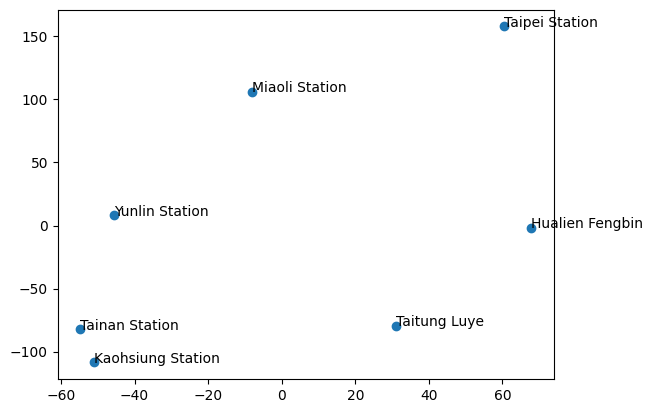

In [27]:
# 使用MDS進行降維
mds = MDS(n_components=2, dissimilarity='precomputed')
coords = mds.fit_transform(distances)

# 繪製2D平面圖
import matplotlib.pyplot as plt

plt.scatter(coords[:, 0], coords[:, 1])
for i, label in enumerate(labels):
    plt.annotate(label, (coords[i, 0], coords[i, 1]))
plt.show()

In [28]:
# 在Google地圖上標記位置
map_center = (sum([loc[0] for loc in locations.values()]) / len(locations), sum([loc[1] for loc in locations.values()]) / len(locations))
m = folium.Map(location=map_center, zoom_start=7)
for label, loc in locations.items():
    folium.Marker(loc, popup=label).add_to(m)
m